# Learning curve

In [25]:
from adni.load_data import load_data
from sklearn.model_selection import train_test_split
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve


In [26]:
# Data loading 
data = load_data()
df= pd.DataFrame(data)

# Reset index, add patient ID's as column
df.reset_index(inplace=True)
df = df.rename(columns = {'index':'ID'})

# Check wheter there is missing data (NaN)
df.notnull().values.any() # Geen missing data

# Als SD 0 dan feature weggooien
df_new = df.drop(df.std()[df.std() == 0].index.values, axis = 1)

# Count number of duplicated patiient ID's
df.index.duplicated().sum() # ID's are indices in df
X = df.drop('ID', axis=1) # Drop patient ID)

# Test / Train split: stratified op label --> nagaan of we dit ook willen
y = df['label'] # Define label y (output)
y = y.replace(['AD', 'CN'], ['1','0']) # moet integer worden voor Learning Curve

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, stratify=X['label'])

# Drop labels and drop patient ID
X_train = X_train.drop('label', axis=1)
X_test = X_test.drop('label', axis=1)
X = X.drop('label', axis=1)



C:\Users\evala\AppData\Local\Temp\ipykernel_23352\2896974261.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_new = df.drop(df.std()[df.std() == 0].index.values, axis = 1)


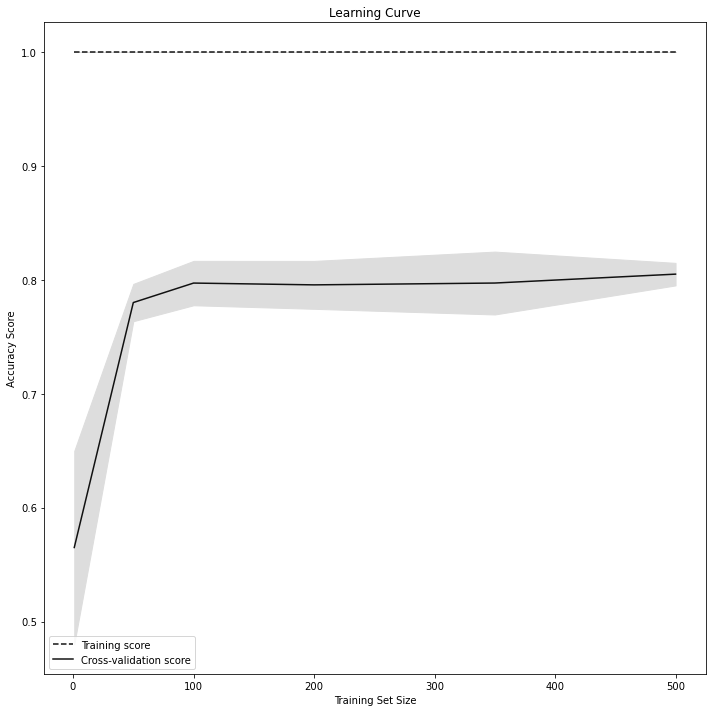

In [29]:

# Loading X_train and y_train

# Aanpassen: RandomForestClassifier + train_sizes

y = y.replace(['AD', 'CN'], ['1','0']) # moet integer worden voor Learning Curve

train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes = [1, 50, 100, 200, 350, 500])

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotten

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()